In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
pd.set_option("display.max_column",None)
sns.set_style("whitegrid")

In [187]:
master_df = pd.read_csv('german_credit_data.csv')

In [188]:
master_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [189]:
master_df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [190]:
master_df = master_df.dropna().reset_index(drop = True)
master_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad


In [191]:
master_df.drop(columns = "Unnamed: 0",inplace = True)
master_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad


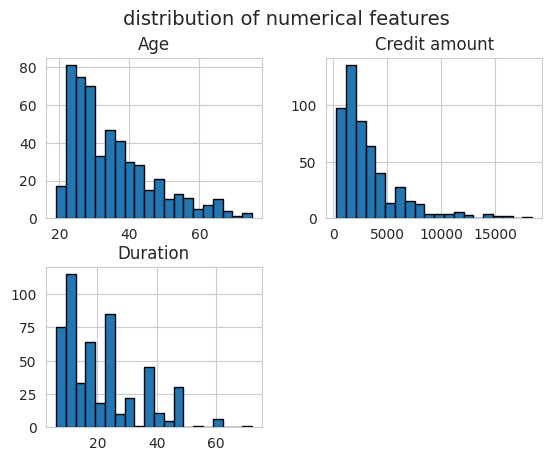

In [192]:
master_df[["Age","Credit amount","Duration"]].hist(bins = 20,edgecolor = "black")
plt.suptitle("distribution of numerical features",fontsize = 14)
plt.show()

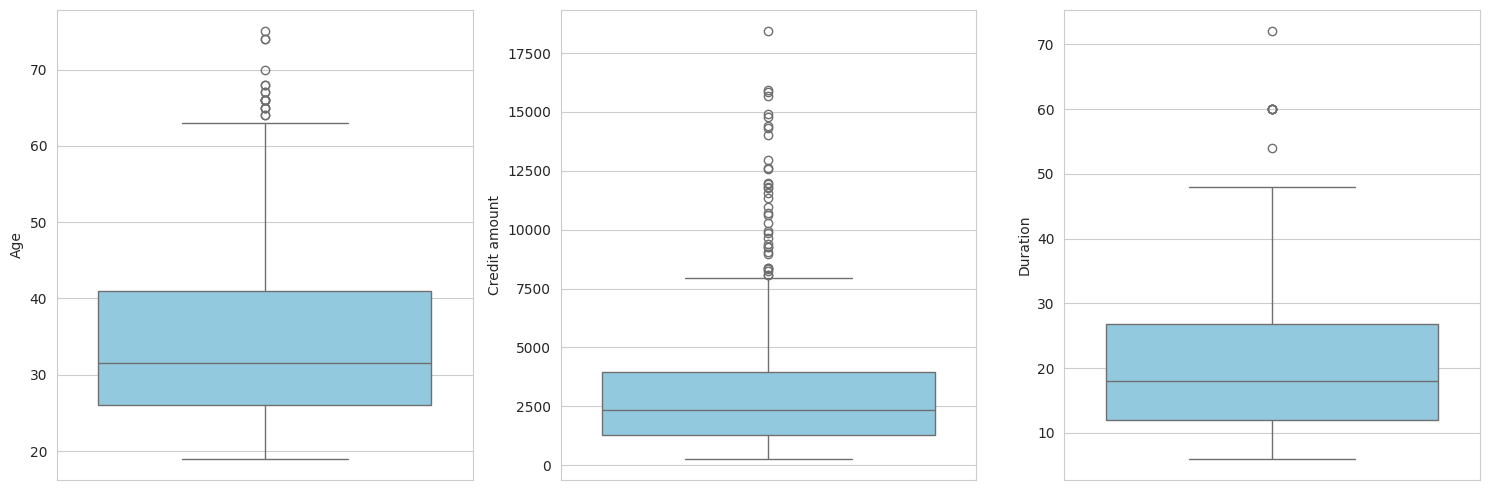

In [193]:
plt.figure(figsize = (15,5))
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y = master_df[col],color = "skyblue")
plt.tight_layout()
plt.show()

In [194]:
master_df.query("Duration > = 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [195]:
catergorical_cols = ["Sex","Job","Housing","Saving accounts","Checking account","Purpose"]

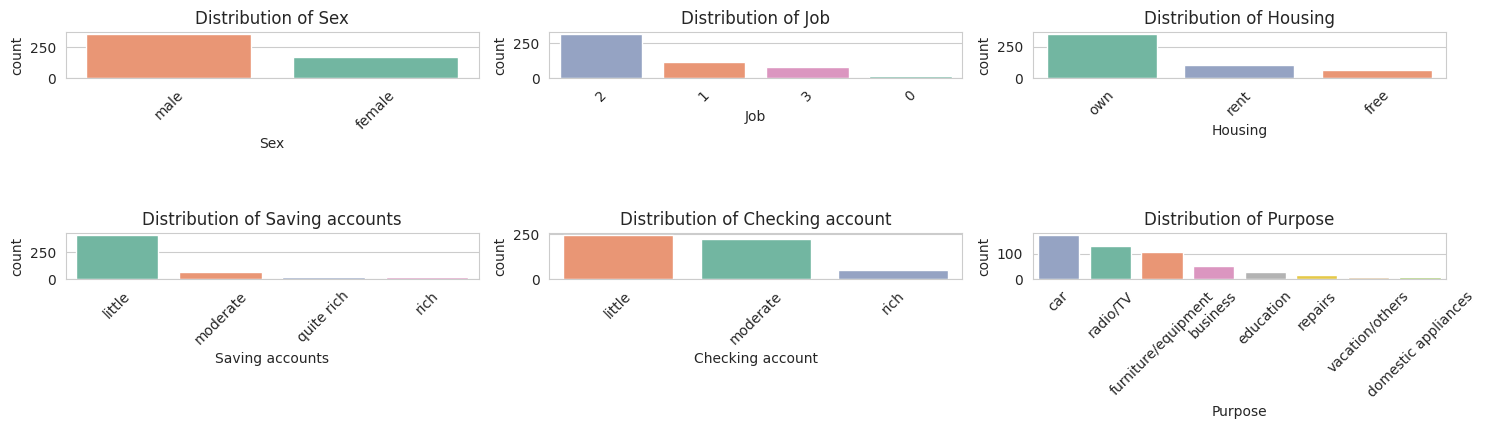

In [196]:
plt.figure(figsize = (15,5))
for i, col in enumerate(catergorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(
        data=master_df,
        x=col,
        hue=col,  # use the same variable as hue
        palette="Set2",
        order=master_df[col].value_counts().index,  # fixed missing .index
        legend=False  # avoid duplicate legends
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

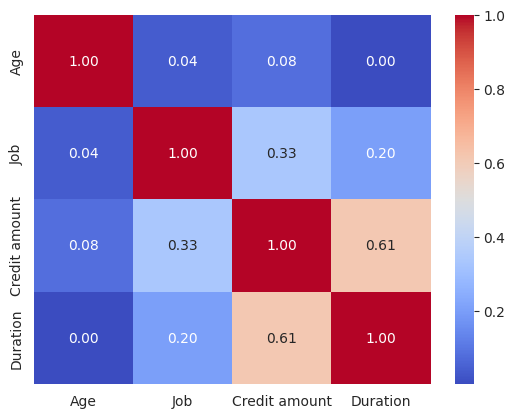

In [197]:
corr = master_df[["Age","Job","Credit amount","Duration"]].corr()
corr
sns.heatmap(corr,annot = True,cmap = "coolwarm",fmt = ".2f")

In [198]:
master_df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [199]:
master_df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [200]:
pd.pivot_table(master_df,values = "Credit amount",index = "Housing",columns = "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


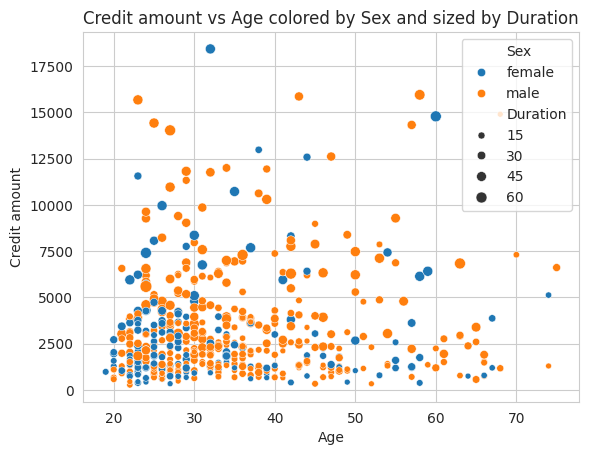

In [201]:
sns.scatterplot(data = master_df,x = "Age",y = "Credit amount",hue = "Sex",size = "Duration")
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

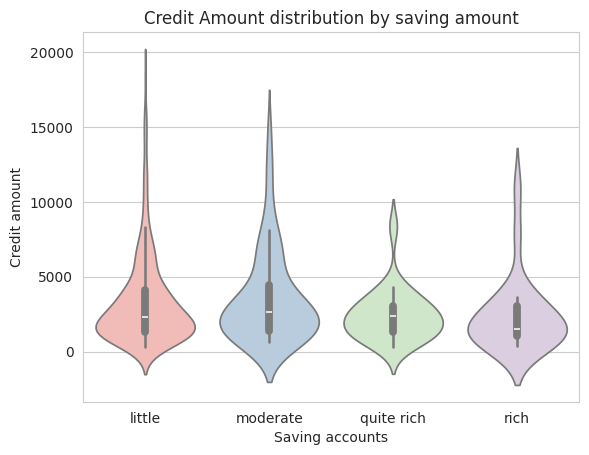

In [202]:
sns.violinplot(data = master_df,x = "Saving accounts",y = "Credit amount",hue = "Saving accounts",palette = "Pastel1",legend = False)
plt.title("Credit Amount distribution by saving amount")
plt.show()

In [203]:
master_df["Risk"].value_counts(normalize = True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

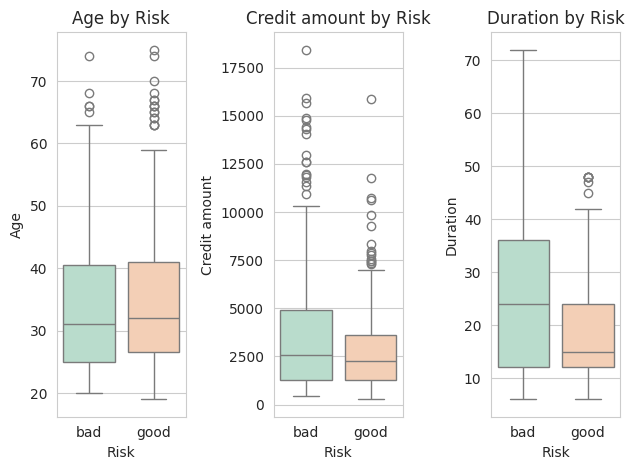

In [204]:
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data = master_df,x = "Risk",hue = "Risk",y = col,palette = "Pastel2",legend = False)
    plt.title(f"{col} by Risk")
plt.tight_layout()
plt.show()

In [205]:
catergorical_cols

['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

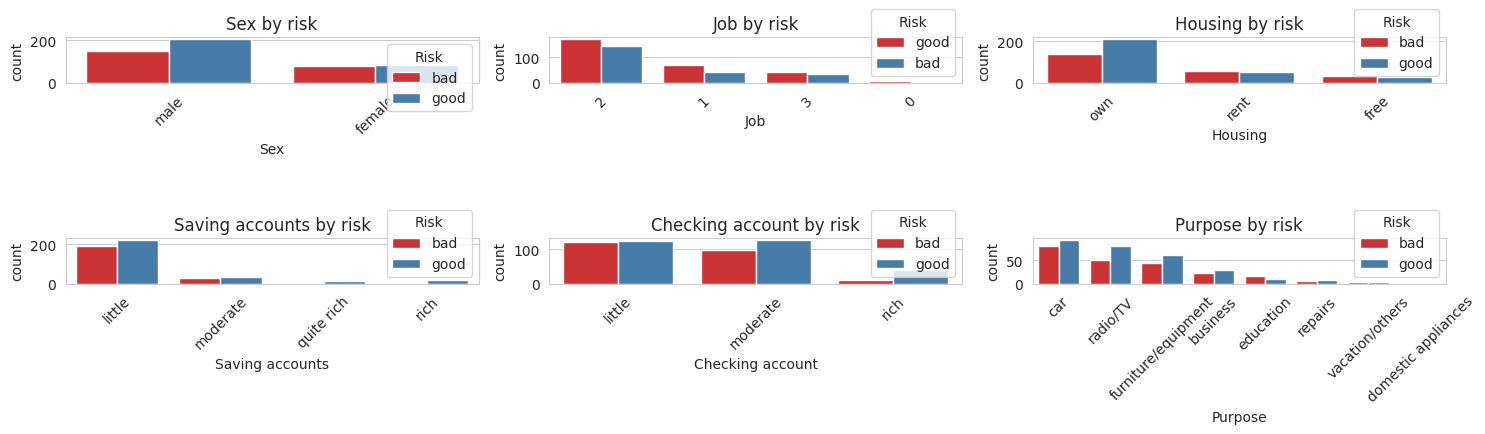

In [206]:
plt.figure(figsize = (15,5))
for i,col in enumerate(catergorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data = master_df,x = col,hue = "Risk",palette = "Set1",order = master_df[col].value_counts().index)
    plt.title(f"{col} by risk")
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [207]:
features = ["Age","Sex","Job","Housing","Saving accounts","Checking account","Credit amount","Duration"]

In [208]:
target = "Risk"

In [209]:
df_model = master_df[features+[target]].copy()

In [210]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [211]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [212]:
cat_column = df_model.select_dtypes(include = "object").columns.drop("Risk")

In [213]:
le_dict = {}

In [214]:
for col in cat_column:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict = le
    joblib.dump(le,f"{col}_encode_pkl")

In [215]:
le_target = LabelEncoder()

In [216]:
df_model[target] = le_target.fit_transform(df_model[target])

In [217]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [218]:
joblib.dump(le_target,"target_encoder.pkl")

['target_encoder.pkl']

In [219]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X = df_model.drop(target,axis = 1)

In [222]:
y = df_model[target]

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state= 1)

In [224]:
X_test.shape

(105, 8)

In [225]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import GridSearchCV

In [226]:
def train_model(model,param_grid,X_train,y_train,X_test,y_test):
    grid = GridSearchCV(model,param_grid,cv = 5,scoring = "accuracy",n_jobs = -1)
    grid.fit(X_train,y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    return best_model,acc,grid.best_params_

# Decision Tree

In [227]:
dt = DecisionTreeClassifier(random_state = 1,class_weight = "balanced")
dt_param_grid = {
    "max_depth":[3,5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [228]:
best_dt,acc_dt,params_dt = train_model(dt,dt_param_grid,X_train,y_train,X_test,y_test)

In [229]:
print("Decision Tree Accuracy",acc_dt)

Decision Tree Accuracy 0.580952380952381


In [230]:
print("Best parameters",params_dt)

Best parameters {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


# Random Forest

In [231]:
rf = RandomForestClassifier(random_state = 1,class_weight = "balanced",n_jobs = -1)

In [232]:
rf_param_grid = {
    "n_estimators":[100,200],
    "max_depth": [5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [233]:
best_rf,acc_rf,param_rf = train_model(rf,rf_param_grid,X_train,y_train,X_test,y_test)

In [234]:
print("Random forest accuracy",acc_rf)

Random forest accuracy 0.6190476190476191


In [235]:
print("Best params",param_rf)

Best params {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


# Extra Tree

In [236]:
et = ExtraTreesClassifier(random_state = 1,class_weight = "balanced",n_jobs = -1)

In [237]:
et_param_grid = {
    "n_estimators":[100,200],
    "max_depth": [5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [238]:
best_et,acc_et,params_et = train_model(et,et_param_grid,X_train,y_train,X_test,y_test)

In [239]:
print("accuracy",acc_et)

accuracy 0.6476190476190476


In [240]:
print("Best params",params_et)

Best params {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


# XGB

In [241]:
xgb = XGBClassifier(random_state = 1,scale_pos_weight = (y_train==0).sum()/(y_train == 1).sum(),eval_metric = "logloss")

In [242]:
xgb_param_grid = {
    "n_estimators":[100,200],
    "max_depth": [3,5,7],
    "learning_rate":[0.01,0.1,0.2],
    "subsample":[0.7,1],
    "colsample_bytree":[0.7,1]
}

In [243]:
best_xgb,acc_xgb,params_xgb = train_model(xgb,xgb_param_grid,X_train,y_train,X_test,y_test)

In [244]:
print("accuracy",acc_xgb)

accuracy 0.6666666666666666


In [247]:
print("Best_params",params_xgb)

Best_params {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


XGB is best model with the highest accuracy of 0.667


In [270]:
from xgboost import XGBClassifier
import joblib

# Train final model with best params (from GridSearchCV)
final_xgb = XGBClassifier(
    random_state=1,
    scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),
    eval_metric="logloss",
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    subsample=1,
    colsample_bytree=0.7
)

final_xgb.fit(X_train, y_train)

# Save the model for later use
joblib.dump(final_xgb, "credit_risk_model.pkl")

['credit_risk_model.pkl']

In [271]:
import pandas as pd

def predict_applicant(applicant_data, model):
    """
    applicant_data: dictionary with applicant features
    model: trained ML model
    """
    # Convert input into DataFrame
    df = pd.DataFrame([applicant_data])
    
    # Apply same preprocessing as training data (encoding/scaling if used)
    # Example: encoding categorical variables
    df = pd.get_dummies(df)
    df = df.reindex(columns=X_train.columns, fill_value=0)  # align with training features
    
    # Make prediction
    pred = model.predict(df)[0]
    proba = model.predict_proba(df)[0][1]  # probability of being 'Good'
    
    if pred == 1:
        return f"Prediction: Good Applicant ✅ (Confidence: {proba:.2f})"
    else:
        return f"Prediction: Bad Applicant ❌ (Confidence: {1-proba:.2f})"


In [272]:
# Load saved model
model = joblib.load("credit_risk_model.pkl")

# Example applicant (replace values as needed)
new_applicant = {
    "Age": 60,
    "Sex": "female",
    "Job": 2,
    "Housing": "own",
    "Saving accounts": "rich",
    "Checking account": "moderate",
    "Credit amount": 1500,
    "Duration": 19,
    "Purpose": "furniture"
}

print(predict_applicant(new_applicant, model))

Prediction: Bad Applicant ❌ (Confidence: 0.69)


In [276]:
good_applicant = {
    "Age": 40,
    "Sex": "female",
    "Job": 2,
    "Housing": "own",
    "Saving accounts": "rich",
    "Checking account": "moderate",
    "Credit amount": 15,
    "Duration": 1,
    "Purpose": "furniture"
}
print(predict_applicant(good_applicant,model))

Prediction: Good Applicant ✅ (Confidence: 0.86)
